# Cluster HW 2 Joon Jung

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("hw2_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


In [ ]:
df.head()

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


It looks like our data set is a lot of 0s and 1s, with all the columns not having specific variables, but names D_0 to D_1014, for all different names on the rows. Let's double check it with the statistical summary.

In [ ]:
df.describe()

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
count,969.0,969.000000,969.0,969.0,969.000000,969.0,969.000000,969.00000,969.000000,969.000000,...,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,1.0,0.900929,1.0,1.0,0.684211,1.0,0.764706,0.68937,0.570691,0.373581,...,0.860681,0.737874,1.0,0.881321,0.854489,0.681115,0.553148,0.809082,0.821465,0.912281
std,0.0,0.298912,0.0,0.0,0.465070,0.0,0.424402,0.46299,0.495233,0.484004,...,0.346458,0.440018,0.0,0.323577,0.352797,0.466285,0.497424,0.393228,0.383160,0.283032
min,1.0,0.000000,1.0,1.0,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.0,1.0,0.000000,1.0,1.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00000,1.000000,0.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since our data is mostly 1s and 0s, we can't see if there is highly correlated variables, or correlation matrix among them, or outliers. Let's drive into our clustering methods.

We need to first scale our data. We know that our data is all 1s and 0s, essentially a binary data so it won't affect our data by whole lot, but it is good practice to do. sklearn.preprocessing has scaler function that we can use.

In [ ]:
from sklearn.preprocessing import StandardScaler

df_num = df.drop(columns=['ID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

In [ ]:
scaled_data

array([[ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ..., -2.05860094,
         0.46619383,  0.31008684],
       ...,
       [ 0.        , -3.01558452,  0.        , ..., -2.05860094,
        -2.14503055,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ..., -2.05860094,
         0.46619383,  0.31008684]])

Let's choose a random k and then come back to it after with optimal k we find from elbow method

In [ ]:
import warnings

# To suppress all warnings, you can use:
warnings.filterwarnings("ignore")

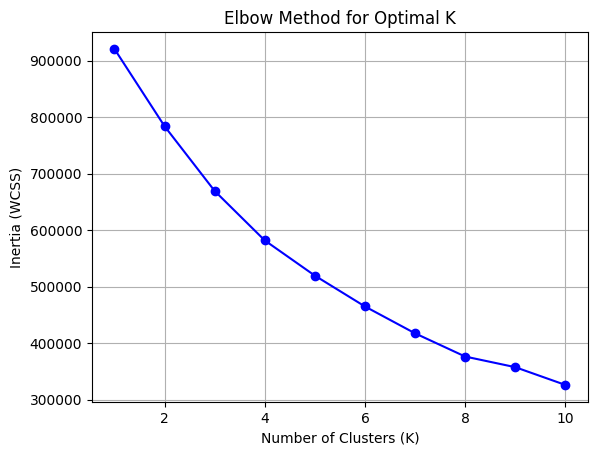

In [ ]:
# Initialize a list to store inertia values for different K
inertia = []

# Determine the optimal K using the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the elbow point
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()



Hmm... It is not as obvious which clusters to use using the elbow method here. We should consider other methods to determine the optimal k. Let's go with k=3 and see what happens.

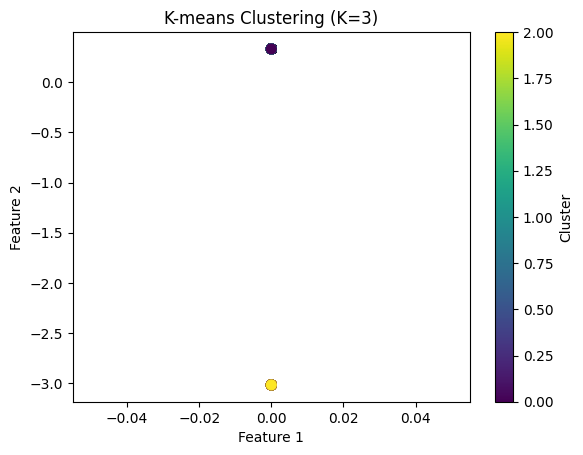

In [ ]:
optimal_k = 3  # chosen by looking at elbow method chart
kmeans = KMeans(n_clusters=optimal_k, random_state=3)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering (K={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


As predicted, it does...make sense why our plot looks the way it does, because it is just bunch of 0s and 1s binary data, so you would only see "two" very overlapped k-means cluster, but certainly we can make it better.

Let's try DBScan which might suit our purposes better.

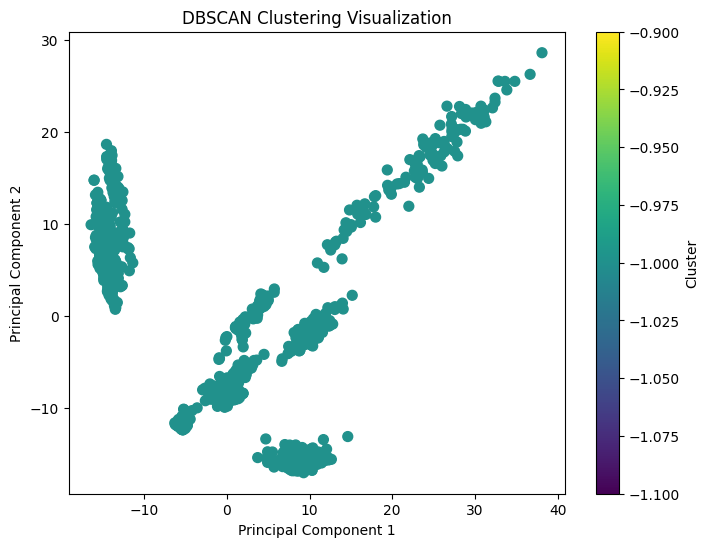

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# First, let's use Euclidean distance metric that we used for k-means above
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

# Fit DBSCAN to the binary data
dbscan.fit_predict(scaled_data)


# Get cluster labels (-1 indicates noise points)
cluster_labels = dbscan.labels_

# Reduce dimensionality using PCA (you can choose the number of components)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the reduced data, colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

Okay! Seems like we are getting somewhere. We can see the groupings that are shown here too.

Now, we should actually try to use different distance metric and see how it looks. Euclidian distance metric might not be the best for our binary data. Let's use Jaccard distance metric.

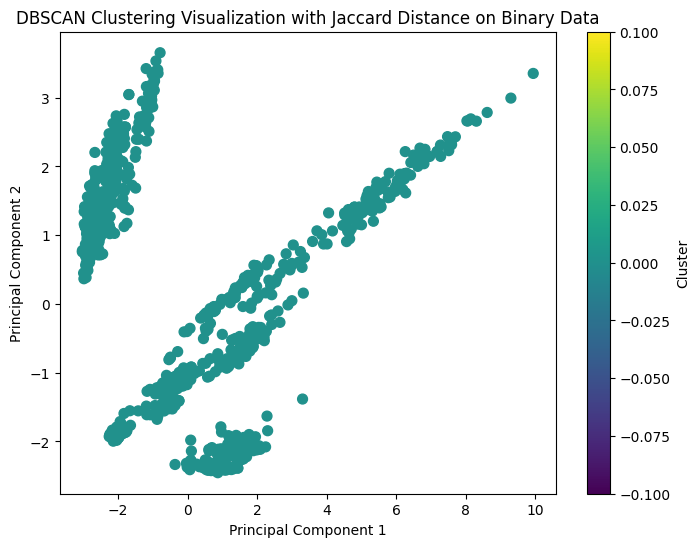

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform

# Convert the data frame to np array, if not, it gives me error when I put in data frame alone
np_data = df_num.values

jaccard_dist_matrix = pairwise_distances(np_data, metric='jaccard')
#jaccard_dist_matrix = squareform(pdist(scaled_data, metric='jaccard'))
# Create a DBSCAN instance with Jaccard distance
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')

# Fit DBSCAN to the Jaccard distance matrix
# dbscan.fit_predict(jaccard_dist_matrix)
# cluster_labels = dbscan.labels_
cluster_labels = dbscan.fit_predict(jaccard_dist_matrix)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(jaccard_dist_matrix)

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Visualization with Jaccard Distance on Binary Data')
plt.colorbar(label='Cluster')
plt.show()


Hmm... there is a slight difference, but switching from euclidian to jaccard distance metric did not seem to have improve our scatter plot by a lot, not as much as I was expecting it to do, since jaccard distance metric would be more suitable for binary data.

I was using PCA dimensionality reduction like K-means on this one. Maybe we can try different dimensionality reduction like tSNE technique.

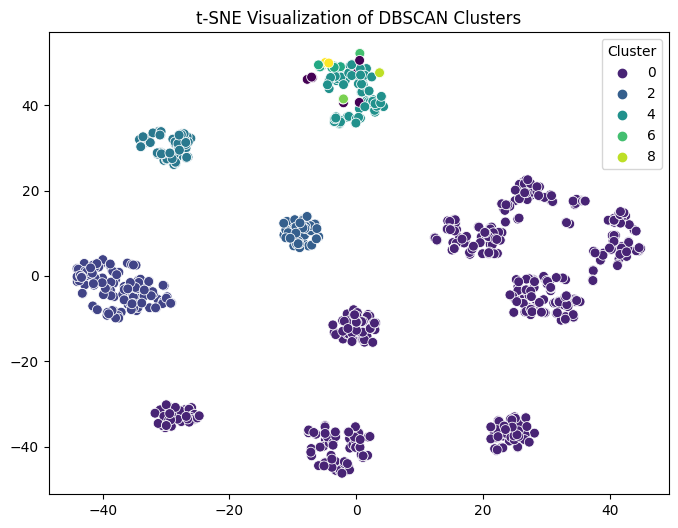

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

# Compute the Jaccard distance matrix
jaccard_dist_matrix = pairwise_distances(df_num.values, metric='jaccard')

# Create a DBSCAN instance with appropriate parameters
dbscan = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')

# Fit DBSCAN to the Jaccard distance matrix and get cluster labels
cluster_labels = dbscan.fit_predict(jaccard_dist_matrix)

# Add the cluster labels to your original DataFrame
df_num['Cluster'] = cluster_labels

# Perform t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_num.drop('Cluster', axis=1))

# Create a scatter plot of t-SNE results, colored by DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_num['Cluster'], palette='viridis', s=50)
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.legend(title='Cluster', loc='best')
plt.show()

Look at that! Seems like tSNE dimensionality reduction seems much data visualization friendly to our eyes, since we can clerly see the clusters here. One thing though, is that the cluster color doesn't seem to represent all the clusters. Seems like almost possibly 5 clusters that are all obviously separate are grouped as one, and there are some mixture of the yellow dots on the first top cluster either. Here, we can play around with the eps and min sample size for it to put it in cluster, and let's see if we can get better cluster.

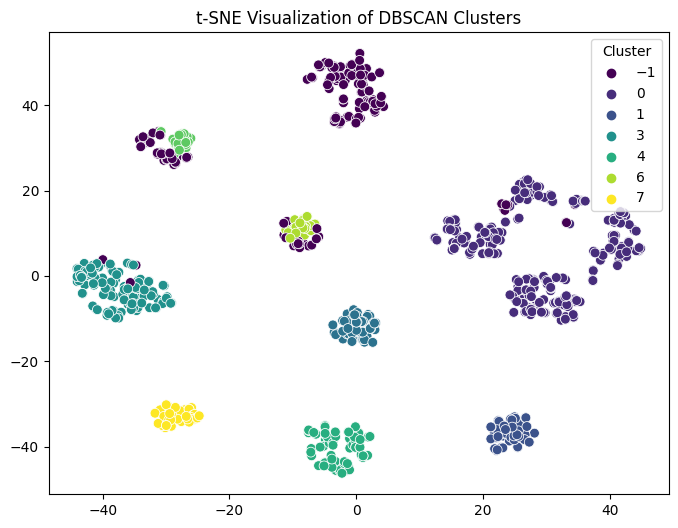

In [ ]:
# We can adjust the eps and min samples here
dbscan = DBSCAN(eps=0.1, min_samples=20, metric='precomputed')

# Fit DBSCAN to the Jaccard distance matrix and get cluster labels
cluster_labels = dbscan.fit_predict(jaccard_dist_matrix)

# Add the cluster labels to your original DataFrame
df_num['Cluster'] = cluster_labels

# Perform t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_num.drop('Cluster', axis=1))

# Create a scatter plot of t-SNE results, colored by DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_num['Cluster'], palette='viridis', s=50)
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.legend(title='Cluster', loc='best')
plt.show()

This seems like the best combination that I could find! All of the clusters are color coded properly, meaning that our cluster labels are appropriate and we can confirm that visually. The dots you see that are mixed with other clusters are noise, as it is shown in the cluster indicating -1. Take out the noise, and you have beautifully separated tsne dimensionality reduced DBScan result that uses Jaccard distance metric!

# Conclusion

We first did some basic EDA to just check out the data that we have. We quickly found out it is a binary data and no null value were found. We then performed a K-means and decided on optimal k value using the elbow method. The elbow method couldn't really tell the best k since the graph looked like it is just graudally decreasing, so we chose a k that seemed most appropriate and then performed k means. The plot looked like just two dots, which makes sense, since it is just binary data, and that is not very helpful to us. We deemed that k-means might not be the best way to analyze this type of data, so we moved on to different clustering method of DBScan, which is another clustering method implemented in scikit-learn. We first used the euclidian distance metric to determine the distances between points, and got the okay result. We could see that there are clusters, but not clearly. We then switched our distance metric to Jaccard distance metric, since it would be more appropriate for our binary data frame. Only to find out, that it did alter the scatter plot, but not by a lot. We know that Jaccard distance metric is appropriate for the binary data format, so then we switched the way how we are visualizing the data through dimensionality reduction. We were using PCA for dimension reduction, and we used tSNE to better visualize our data. We found the best way to represent the data, but our cluster labels were not matching with the visual, meaning we had to adjust the parameters of how clusters are being separate. We then altered the eps and min_sample size for the DBScan to decide that this is the cluster, and we finally got a great data visualization and the right clusters. Some dots that we see that are mixed in different clusters are shown as -1, meaning they are the noise, so our clusters are all divided correctly.